In [59]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns

###############################################

import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from matplotlib.pyplot import *

C:\Users\Gbhat2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [3]:
 
titanic = pd.read_csv('titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
data=titanic[['Age','Sex','Pclass','SibSp','Fare','Parch']]
data

,Age,Sex,Pclass,SibSp,Fare,Parch
0,22.0,male,3,1,7.2500,0
1,38.0,female,1,1,71.2833,0
2,26.0,female,3,0,7.9250,0
3,35.0,female,1,1,53.1000,0
4,35.0,male,3,0,8.0500,0
...,...,...,...,...,...,...
886,27.0,male,2,0,13.0000,0
887,19.0,female,1,0,30.0000,0
888,NaN,female,3,1,23.4500,2
889,26.0,male,1,0,30.0000,0


In [7]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Age,177,19.9
Parch,0,0.0
Fare,0,0.0
SibSp,0,0.0
Pclass,0,0.0


In [8]:
data['Fare'].value_counts

<bound method IndexOpsMixin.value_counts of 0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64>

In [9]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


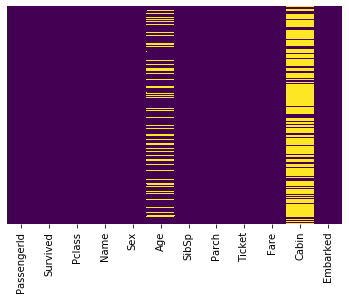

In [10]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

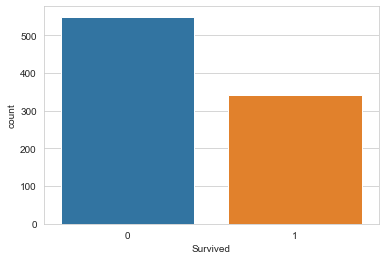

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic)

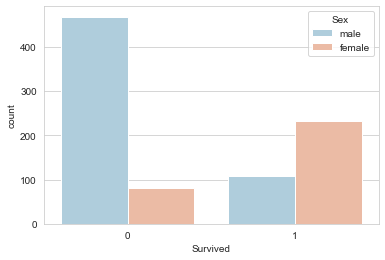

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='RdBu_r')

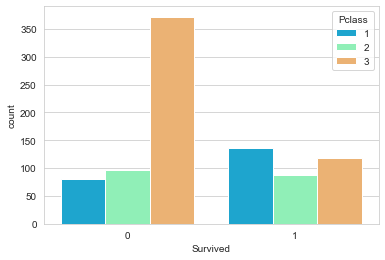

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='rainbow')

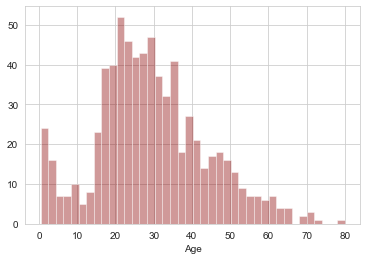

In [14]:
sns.distplot(titanic['Age'].dropna(),kde=False,color='darkred',bins=40)

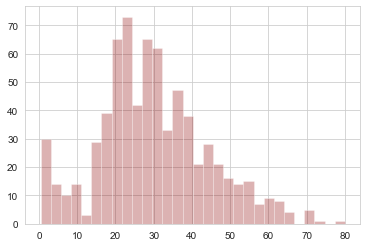

In [15]:
titanic['Age'].hist(bins=30,color='darkred',alpha=0.3)

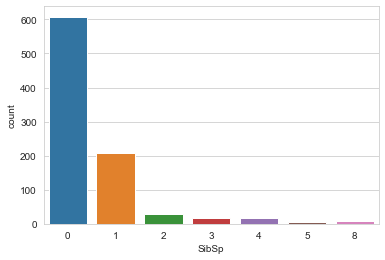

In [16]:
sns.countplot(x='SibSp',data=titanic)

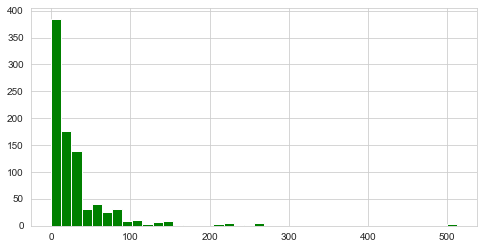

In [17]:
titanic['Fare'].hist(color='green',bins=40,figsize=(8,4))

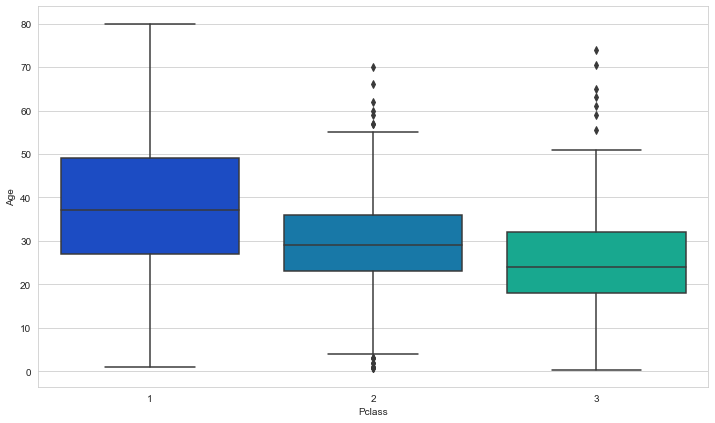

In [62]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='winter')

In [18]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [19]:
#Applying function impute_age

titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

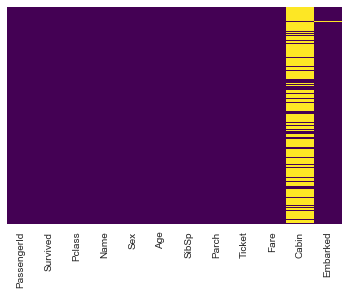

In [20]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
#titanic.drop('Cabin',axis=1,inplace=True)


In [24]:
#titanic.head()
data.head()

,Age,Sex,Pclass,SibSp,Fare,Parch
0,22.0,male,3,1,7.2500,0
1,38.0,female,1,1,71.2833,0
2,26.0,female,3,0,7.9250,0
3,35.0,female,1,1,53.1000,0
4,35.0,male,3,0,8.0500,0


In [25]:
titanic.dropna(inplace=True)

In [26]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 1 to 889
Data columns (total 12 columns):
PassengerId    202 non-null int64
Survived       202 non-null int64
Pclass         202 non-null int64
Name           202 non-null object
Sex            202 non-null object
Age            202 non-null float64
SibSp          202 non-null int64
Parch          202 non-null int64
Ticket         202 non-null object
Fare           202 non-null float64
Cabin          202 non-null object
Embarked       202 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 20.5+ KB


In [28]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)

In [29]:
#X=titanic.drop(['Embarked','Name','Ticket'],axis=1,inplace=True)

In [30]:
#titanic.head()

In [78]:
#You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare to predict whether a passenger is survived

In [31]:
titanic = pd.concat([titanic,sex],axis=1)

In [32]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0


In [34]:

y = titanic['Survived']
y

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 202, dtype: int64

In [35]:
data

,Age,Sex,Pclass,SibSp,Fare,Parch
0,22.0,male,3,1,7.2500,0
1,38.0,female,1,1,71.2833,0
2,26.0,female,3,0,7.9250,0
3,35.0,female,1,1,53.1000,0
4,35.0,male,3,0,8.0500,0
...,...,...,...,...,...,...
886,27.0,male,2,0,13.0000,0
887,19.0,female,1,0,30.0000,0
888,NaN,female,3,1,23.4500,2
889,26.0,male,1,0,30.0000,0


In [36]:
titanic['Sex']

1      female
3      female
6        male
10     female
11     female
        ...  
871    female
872      male
879    female
887    female
889      male
Name: Sex, Length: 202, dtype: object

In [41]:
sex = pd.get_dummies(data['Sex'],drop_first=True)


In [48]:
# import pandas library
import pandas as pd
  
# creating file handler for
# our example.csv file in
# read mode
file_handler = open("titanic.csv", "r")
  
# creating a Pandas DataFrame
# using read_csv function that
# reads from a csv file.
data = pd.read_csv(file_handler, sep = ",")
  
# closing the file handler
file_handler.close()
# traversing through Gender 
# column of dataFrame and 
# writing values where
# condition matches.
data.Sex[data.Sex == 'male'] = 0
data.Sex[data.Sex == 'female'] = 1
data

C:\Users\Gbhat2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Gbhat2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [49]:
data=data[['Age','Sex','Pclass','SibSp','Fare','Parch','Survived']]
data

,Age,Sex,Pclass,SibSp,Fare,Parch,Survived
0,22.0,0,3,1,7.2500,0,0
1,38.0,1,1,1,71.2833,0,1
2,26.0,1,3,0,7.9250,0,1
3,35.0,1,1,1,53.1000,0,1
4,35.0,0,3,0,8.0500,0,0
...,...,...,...,...,...,...,...
886,27.0,0,2,0,13.0000,0,0
887,19.0,1,1,0,30.0000,0,1
888,NaN,1,3,1,23.4500,2,0
889,26.0,0,1,0,30.0000,0,1


In [66]:
X=data.drop(columns='Survived')
X

,Age,Sex,Pclass,SibSp,Fare,Parch
0,22.0,0,3,1,7.2500,0
1,38.0,1,1,1,71.2833,0
2,26.0,1,3,0,7.9250,0
3,35.0,1,1,1,53.1000,0
4,35.0,0,3,0,8.0500,0
...,...,...,...,...,...,...
886,27.0,0,2,0,13.0000,0
887,19.0,1,1,0,30.0000,0
888,24.0,1,3,1,23.4500,2
889,26.0,0,1,0,30.0000,0


In [83]:
# #finding best fit with gridsearch
# param_grid = {'min_samples_leaf':np.arange(20,50,5),
#               'min_samples_split':np.arange(20,50,5),
#               'max_depth':np.arange(3,6),
#               'min_weight_fraction_leaf':np.arange(0,0.4,0.1),
#               'criterion':['gini','entropy']}
# clf = tree.DecisionTreeClassifier()
# tree_search = GridSearchCV(clf, param_grid, scoring='average_precision')

# X =  tree_data["train"].drop("PassengerId",axis=1)
# Y = combined_cleaned["train"]["Survived"]
# tree_search.fit(X,Y)

NameError: name 'tree' is not defined

In [54]:
y=data['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [55]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 355)

In [61]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Age,177,19.9
Survived,0,0.0
Parch,0,0.0
Fare,0,0.0
SibSp,0,0.0


In [62]:
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)
data


C:\Users\Gbhat2\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Age,Sex,Pclass,SibSp,Fare,Parch,Survived
0,22.0,0,3,1,7.2500,0,0
1,38.0,1,1,1,71.2833,0,1
2,26.0,1,3,0,7.9250,0,1
3,35.0,1,1,1,53.1000,0,1
4,35.0,0,3,0,8.0500,0,0
...,...,...,...,...,...,...,...
886,27.0,0,2,0,13.0000,0,0
887,19.0,1,1,0,30.0000,0,1
888,24.0,1,3,1,23.4500,2,0
889,26.0,0,1,0,30.0000,0,1


In [67]:
X=data.drop(columns='Survived')
X

,Age,Sex,Pclass,SibSp,Fare,Parch
0,22.0,0,3,1,7.2500,0
1,38.0,1,1,1,71.2833,0
2,26.0,1,3,0,7.9250,0
3,35.0,1,1,1,53.1000,0
4,35.0,0,3,0,8.0500,0
...,...,...,...,...,...,...
886,27.0,0,2,0,13.0000,0
887,19.0,1,1,0,30.0000,0
888,24.0,1,3,1,23.4500,2
889,26.0,0,1,0,30.0000,0


In [68]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Survived,0,0.0
Parch,0,0.0
Fare,0,0.0
SibSp,0,0.0
Pclass,0,0.0
Sex,0,0.0
Age,0,0.0


In [69]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 355)

In [70]:
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [71]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
feature_name

['Age', 'Sex', 'Pclass', 'SibSp', 'Fare', 'Parch']

In [72]:
class_name

[1, 0]

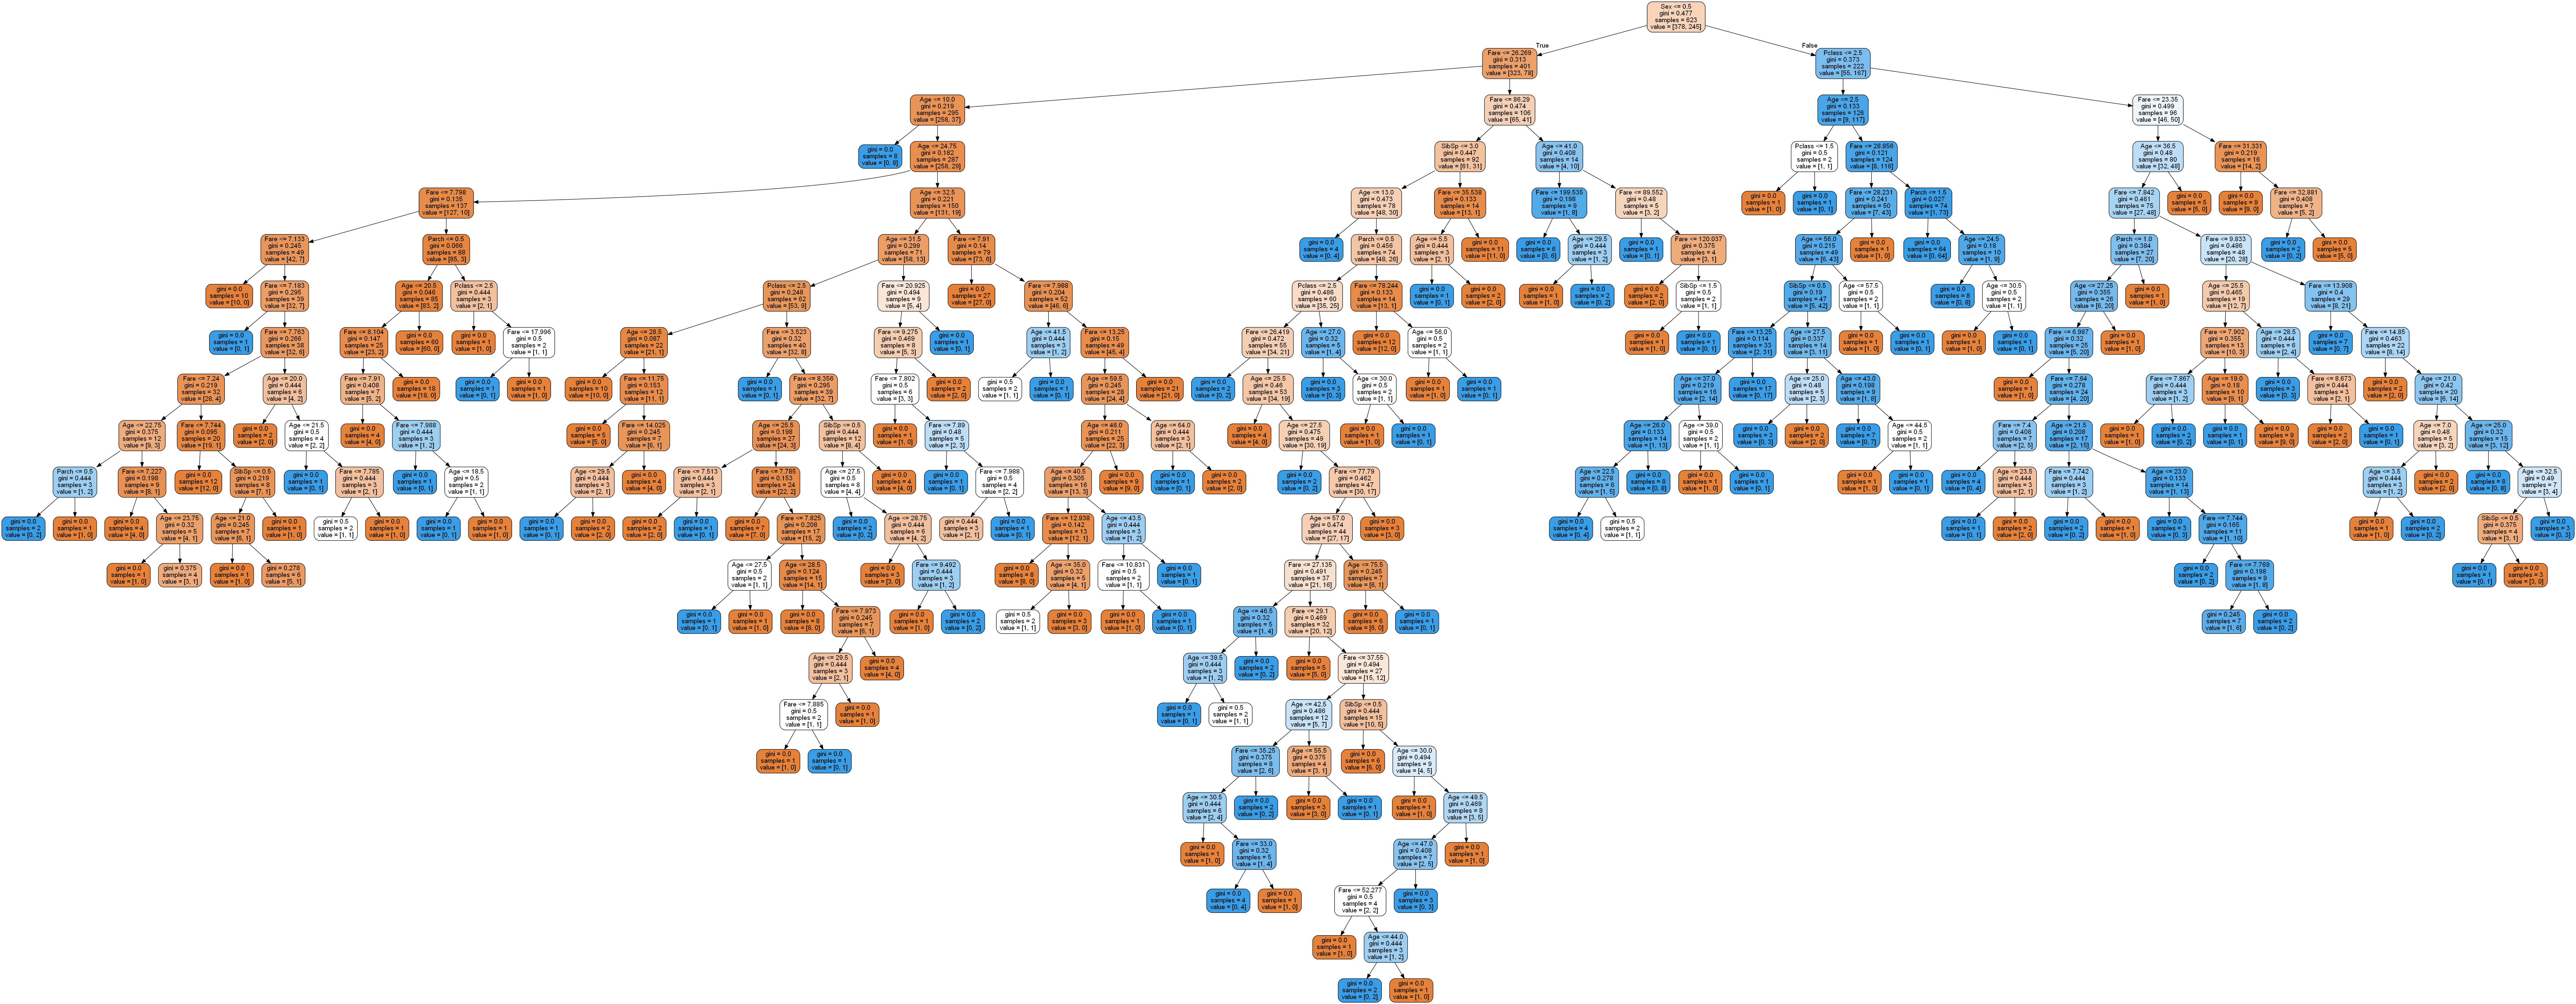

In [73]:
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,feature_names = feature_name,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

In [74]:
clf.score(x_train,y_train)

0.985553772070626

In [75]:
py_pred = clf.predict(x_test)

In [76]:
py_pred = clf.predict(y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1.
 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 0. 1. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [77]:
clf.score(x_test,y_test)

0.7611940298507462

In [78]:
scalar = StandardScaler()

x_transform = scalar.fit_transform(X)

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x_transform,y,test_size = 0.30, random_state= 355)

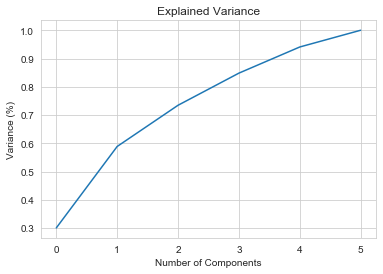

In [80]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
pca = PCA()
principalComponents = pca.fit_transform(x_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [81]:
pca = PCA(n_components=6)
new_data = pca.fit_transform(x_transform)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6'])

In [82]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6
0,-1.186586,0.458355,0.579065,0.284109,-0.358106,0.124515
1,1.889875,-0.704002,-0.745372,0.112088,-1.019341,-0.319538
2,-0.601888,0.285849,-1.591132,-0.058536,-0.311672,0.433692
3,1.617648,-0.560689,-0.837596,0.113575,-1.032969,-0.606007
4,-1.177517,-0.545217,0.300918,-0.323609,0.100799,0.475943
...,...,...,...,...,...,...
886,-0.580358,-0.678690,0.310160,0.350409,0.161537,-0.511423
887,0.882515,-0.360395,-1.451139,0.900046,-0.270710,-1.192571
888,0.577174,2.044472,-0.872957,-1.038250,0.731296,0.187107
889,0.274491,-1.110257,0.423358,0.744964,0.167046,-1.196643


In [83]:
# let's see how well our model perform on this new data
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 0.30, random_state= 355)
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.7574626865671642

In [89]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    #'n_estimators':np.arange(3,11,2),
    #'min_weight_fraction_leaf':np.arange(0,0.4,0.1),
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [90]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [91]:
grid_search.fit(x_train,y_train)

C:\Users\Gbhat2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'm

In [92]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


In [93]:
grid_search.best_score_

0.8154093097913323

In [94]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth =5, min_samples_leaf= 1, min_samples_split= 2, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [95]:
clf.score(x_test,y_test)

0.7835820895522388

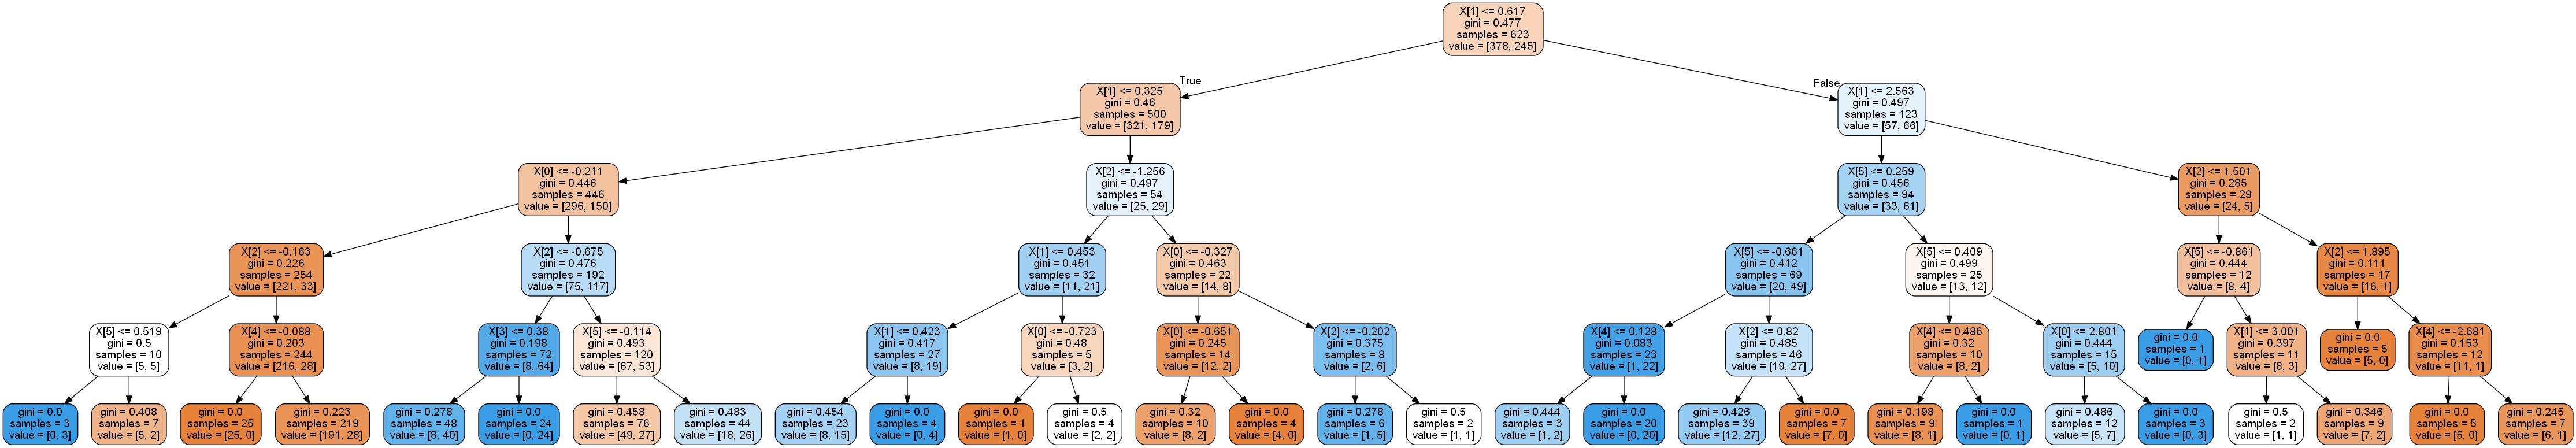

In [96]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
#graph.write_png("tree.png")
# Show graph
Image(graph.create_png())